# Intel® Extension for Scikit-learn TSNE for MNIST dataset

In [1]:
from timeit import default_timer as timer
from sklearn import metrics
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Download the data 
The MNIST database of handwritten digits with 784 features.
<br/>
It can be split in a training set of the first 60,000 examples,
    and a test set of 10,000 examples <br/>  
Source: <br/>    
Yann LeCun, Corinna Cortes, Christopher J.C. Burges
http://yann.lecun.com/exdb/mnist/


In [2]:
x, y = fetch_openml(name='mnist_784', return_X_y=True)

### Patch original Scikit-learn with Intel® Extension for Scikit-learn
Intel® Extension for Scikit-learn (previously known as daal4py) contains drop-in replacement functionality for the stock Scikit-learn package. You can take advantage of the performance optimizations of Intel® Extension for Scikit-learn by adding just two lines of code before the usual Scikit-learn imports:

In [3]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Intel® Extension for Scikit-learn patching affects performance of specific Scikit-learn functionality. Refer to the [list of supported algorithms and parameters](https://intel.github.io/scikit-learn-intelex/algorithms.html) for details. In cases when unsupported parameters are used, the package fallbacks into original Scikit-learn. If the patching does not cover your scenarios, [submit an issue on GitHub](https://github.com/intel/scikit-learn-intelex/issues).

Training TSNE algorithm with Intel® Extension for Scikit-learn for MNIST dataset

In [4]:
from sklearn.manifold import TSNE

params = {
    'n_components': 2,
    'random_state': 42
}
start = timer()
tsne = TSNE(**params)
embedding_intelex = tsne.fit_transform(x)
time_opt = timer() - start
f"Intel® extension for Scikit-learn time: {time_opt:.2f} s"

'Intel® extension for Scikit-learn time: 44.06 s'

In [5]:
print(f"Intel® Extension for scikit-learn. Divergence: {tsne.kl_divergence_}")

Intel® Extension for scikit-learn. Divergence: 3.176028730018227


  ### Train the same algorithm with original Scikit-learn
In order to cancel optimizations, we use *unpatch_sklearn* and reimport the class TSNE.

In [6]:
from sklearnex import unpatch_sklearn
unpatch_sklearn()

Training algorithm with original Scikit-learn library for MNIST dataset

In [7]:
from sklearn.manifold import TSNE

params = {
    'n_components': 2,
    'random_state': 42
}
start = timer()
tsne = TSNE(**params)
embedding_original = tsne.fit_transform(x)
time_original = timer() - start
f"Original Scikit-learn time: {time_original:.2f} s"

'Original Scikit-learn time: 157.24 s'

In [8]:
print(f"Original Scikit-learn. Divergence: {tsne.kl_divergence_}")

Original Scikit-learn. Divergence: 3.2369678020477295


### Plot embeddings original scikit-learn and Intel® extension

In [9]:
colors = [int(m) for m in y]

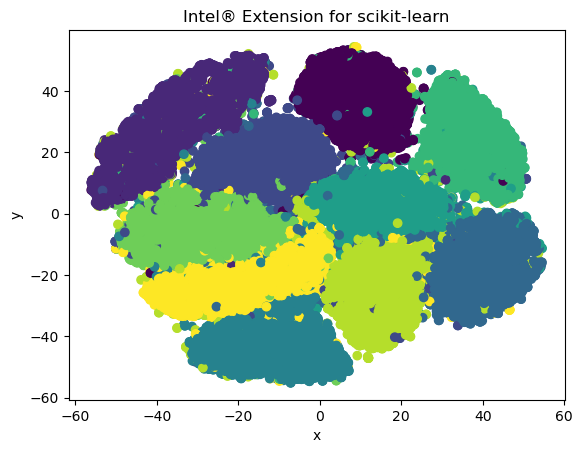

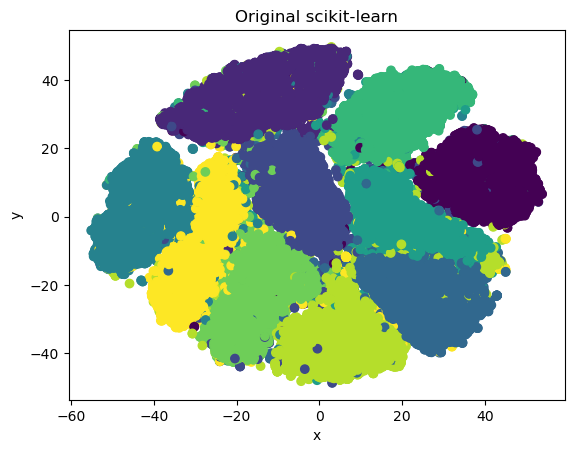

In [10]:
for emb, title in zip([embedding_intelex, embedding_original], 
                      ['Intel® Extension for scikit-learn', 'Original scikit-learn']):
    plt.scatter(emb[:, 0], emb[:, 1], c=colors)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [11]:
f"Speedup for this run: {(time_original/time_opt):.1f}"

'Speedup for this run: 3.6'